# Analysis of Sample Data

In [1]:
from collections import Counter

from matplotlib import (mlab, pyplot as plt)
import numpy as np
import pandas as pd
import nltk as nl
from wordcloud import WordCloud

from sentiment_analysis import (database as db, entities as et, util)

In [2]:
df = pd.read_sql_table('game_review', db.engine)
df.head()

,id,user_id,game_id,rating,comment,comment_lower,train
0,1,142253,105,6.0,A classic.,a classic.,True
1,2,100326,24480,7.5,"High churn game. I like this better than most,...","high churn game. i like this better than most,...",True
2,3,105806,121921,8.5,"Best co-op I own Lots of choices, lots of dep...","best co-op i own lots of choices, lots of dep...",True
3,4,191459,79828,8.0,Limited Edition Signed Copy 128/1000. [10 pla...,limited edition signed copy 128/1000. [10 pla...,True
4,5,64270,36218,6.0,Too much of a multiplayer solitaire. It is jus...,too much of a multiplayer solitaire. it is jus...,True


# Rating Column Analysis

Comment length median:  7.5
Comment length median:  7.251676505312869


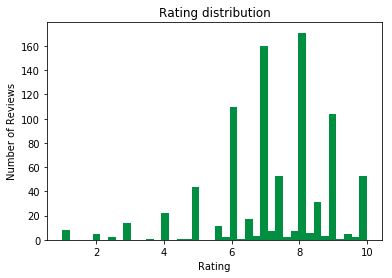

In [3]:
num_bins = 40

plt.hist(df.rating, num_bins, facecolor=util.green)

plt.title('Rating distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

print('Comment length median: ', df.rating.median())
print('Comment length median: ', df.rating.mean())


plt.show()

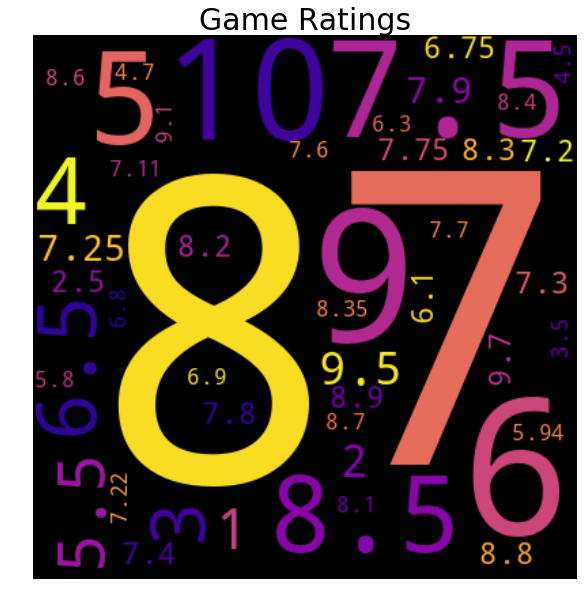

In [4]:
wc = WordCloud(width=400, height=400,colormap='plasma').generate_from_frequencies(
    dict(
        Counter([ str(int(v) if v.is_integer() else v) for v in df.rating.tolist() ])
    )
)
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Game Ratings', fontsize=30)
plt.axis('off');

# Comment Column Analysis

Significant word count: 3943


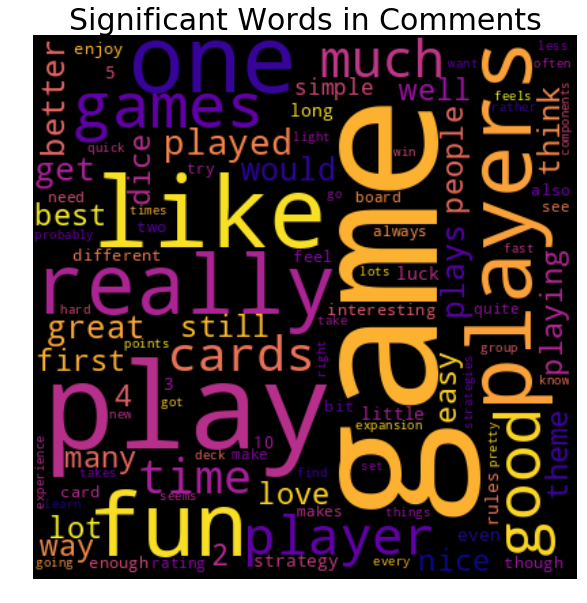

In [5]:
sw = set(nl.corpus.stopwords.words('english'))

words = Counter([w for w in nl.RegexpTokenizer(r'\w+').tokenize(df.comment.str.cat(sep=' ').lower()) if w not in sw])

print('Significant word count: %d' % len(words))

wc = WordCloud(width=400, height=400,colormap='plasma').generate_from_frequencies(dict(words.most_common(100)))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Significant Words in Comments', fontsize=30)
plt.axis('off');

In [6]:
wdf = pd.read_sql_table('sig_word', db.engine)
wdf.head()

,id,word,count,game_count,median,median_q25,median_q50,median_q75,iqr,mode,mean,stdev,pstdev,variance,pvariance
0,1,pull,7,7,7.00,5.000,7.00,8.600,3.600,NaN,6.743,2.080750,1.92640,4.329520,3.711020
1,2,its,47,38,8.00,6.000,8.00,8.200,2.200,NaN,7.506,1.378940,1.36419,1.901480,1.861020
2,3,non,4,4,8.50,7.750,8.50,9.025,1.275,NaN,8.275,0.984463,0.85257,0.969167,0.726875
3,4,matches,2,2,8.65,8.475,8.65,8.825,0.350,NaN,8.650,0.494975,0.35000,0.245000,0.122500
4,5,achievements,1,1,9.00,9.000,9.00,9.000,0.000,9.0,9.000,NaN,0.00000,NaN,0.000000


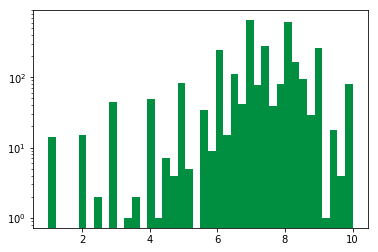

In [7]:
num_bins = 40

_, ax = plt.subplots()
ax.set_yscale('log')
plt.hist(wdf.median_q50, num_bins, facecolor=util.green)
plt.show()

In [8]:
oh = et.SigWordUse.onehot()
oh.iloc[:,1:]

,user_id,_rating,abilities,ability,able,about,above,absolute,abstract,accessible,...,yeah,year,years,yellow,yes,yet,you,younger,your,zombie
0,100693,6.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,181797,6.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20323,6.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,56726,8.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,62997,4.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,42121,10.00,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,10602,6.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,14263,7.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,28559,7.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,191984,7.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Comment length mean:  227.81582054309328
Comment length min:   6
Comment length max:   7977


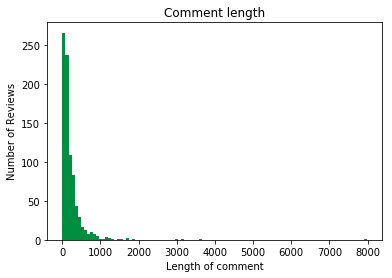

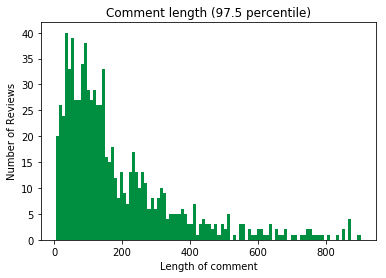

In [9]:
len_df = df.comment.str.len()

print('Comment length mean: ', len_df.mean())
print('Comment length min:  ', len_df.min())
print('Comment length max:  ', len_df.max())

num_bins = 100

plt.hist(len_df, num_bins, facecolor=util.green)

plt.title('Comment length')
plt.xlabel('Length of comment')
plt.ylabel('Number of Reviews')
plt.show()

upper_comment_bound = np.percentile(len_df, [0, 97.5])[1]

plt.hist(len_df[len_df < upper_comment_bound].dropna(), num_bins, facecolor=util.green)

plt.title('Comment length (97.5 percentile)')
plt.xlabel('Length of comment')
plt.ylabel('Number of Reviews')
plt.show()

# GameID Column Analysis

Review count mean:  2.630434782608696
Review count min:   1
Review count max:   16


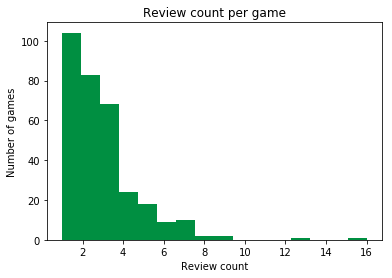

In [10]:
gameID_df = pd.DataFrame({'review_count': list(Counter(df.game_id).values()) })

print('Review count mean: ', gameID_df.review_count.mean())
print('Review count min:  ', gameID_df.review_count.min())
print('Review count max:  ', gameID_df.review_count.max())

plt.hist(gameID_df.review_count, gameID_df.review_count.max(), facecolor=util.green)
plt.title('Review count per game')
plt.xlabel('Review count')
plt.ylabel('Number of games')
plt.show()

# UserID Column Analysis

Review count mean:  1.0204819277108435
Review count min:   1
Review count max:   2


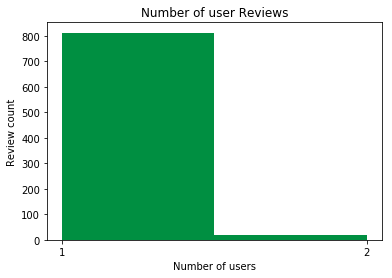

In [11]:
userID_df = pd.DataFrame({'review_count': list(Counter(df.user_id).values())})

print('Review count mean: ', userID_df.review_count.mean())
print('Review count min:  ', userID_df.review_count.min())
print('Review count max:  ', userID_df.review_count.max())

plt.hist(userID_df.review_count, userID_df.review_count.max(), facecolor=util.green)
plt.title('Number of user Reviews')
plt.xlabel('Number of users')
plt.xticks(range(userID_df.review_count.min(), userID_df.review_count.max() + 1))
plt.ylabel('Review count')
plt.show()

# Comment x Rating Analysis

In [12]:
num_bins = 40


d = pd.cut(df.rating, 20)
